<a href="https://colab.research.google.com/github/hbaflast/bert-sentiment-analysis-pytorch/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Exercice**

### **Importation de module**

In [ ]:
import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! nvidia-smi

Thu Aug 30 12:40:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    54W / 149W |  10875MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### **Importation de données**

In [ ]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

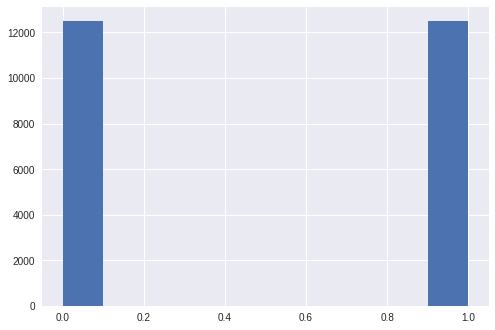

In [ ]:
plt.hist(y_train);

In [ ]:
x_test.shape, y_test.shape

((25000,), (25000,))

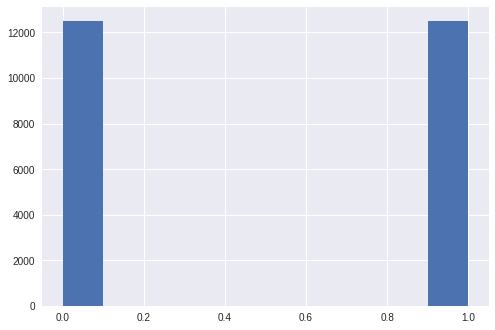

In [ ]:
plt.hist(y_test);

In [ ]:
print("Taille de la première phrase : " + str(len(x_train[0])))
print("Taille de la deuxième phrase : " + str(len(x_train[1])))

Taille de la première phrase : 218
Taille de la deuxième phrase : 189


In [ ]:
def plot_len_distribution(dataset):
  len_list = []
  for list_ in dataset:
    len_ = len(list_)
    len_list.append(len_)
  plt.hist(len_list);

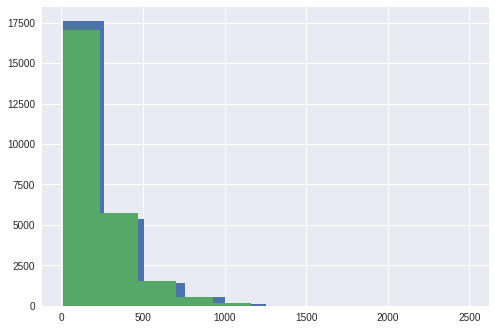

In [ ]:
plot_len_distribution(x_train)
plot_len_distribution(x_test)

### **Décodage des vecteurs**

In [ ]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [ ]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### **Preprocessing**

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                     value=word_index["<PAD>"],
                                                     padding='post',
                                                     maxlen=256)

X_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                    value=word_index["<PAD>"],
                                                    padding='post',
                                                    maxlen=256)

In [ ]:
X_train.shape

(25000, 80)

In [ ]:
X_train[0]

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,
        530,  476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,
        104,   88,    4,  381,   15,  297,   98,   32, 2071,   56,   26,
        141,    6,  194, 7486,   18,    4,  226,   22,   21,  134,  476,
         26,  480,    5,  144,   30, 5535,   18,   51,   36,   28,  224,
         92,   25,  104,    4,  226,   65,   16,   38, 1334,   88,   12,
         16,  283,    5,   16, 4472,  113,  103,   32,   15,   16, 5345,
         19,  178,   32], dtype=int32)

### **Definition du model**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Conv1D
from keras.layers import Dropout, Flatten, Dense, LSTM, MaxPooling1D
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
def create_model():
  
  num_words = 10000
  
  model = Sequential()
  model.add(Embedding(num_words, 128, input_length=256))
  model.add(LSTM(128))
  model.add(Dense(1, activation='sigmoid'))
  
  opt = Adam(lr=0.001)
  
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  return model

In [ ]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 256, 16)           160000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               279552    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 439,809
Trainable params: 439,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.5,
                    shuffle=True)

Train on 12500 samples, validate on 12500 samples
Epoch 1/20
12500/12500 [==============================] - 73s 6ms/step - loss: 0.6927 - acc: 0.5058 - val_loss: 0.6926 - val_acc: 0.4970
Epoch 2/20
12500/12500 [==============================] - 72s 6ms/step - loss: 0.7266 - acc: 0.5372 - val_loss: 0.6871 - val_acc: 0.5218
Epoch 3/20
12500/12500 [==============================] - 70s 6ms/step - loss: 0.6739 - acc: 0.5746 - val_loss: 0.6764 - val_acc: 0.5554
Epoch 4/20
12500/12500 [==============================] - 70s 6ms/step - loss: 0.6479 - acc: 0.6124 - val_loss: 0.6642 - val_acc: 0.5726
Epoch 5/20
12500/12500 [==============================] - 71s 6ms/step - loss: 0.6001 - acc: 0.6498 - val_loss: 0.6411 - val_acc: 0.5949
Epoch 6/20
12500/12500 [==============================] - 72s 6ms/step - loss: 0.6016 - acc: 0.6577 - val_loss: 0.6740 - val_acc: 0.5373
Epoch 7/20
12500/12500 [==============================] - 70s 6ms/step - loss: 0.6110 - acc: 0.6023 - val_loss: 0.6681 - val_acc

KeyboardInterrupt: ignored

### **Evaluation du model**

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25000/25000 [==============================] - 2s 65us/step
Test loss: 0.9900973887991905
Test accuracy: 0.83472


### **Affichage courbes de loss**

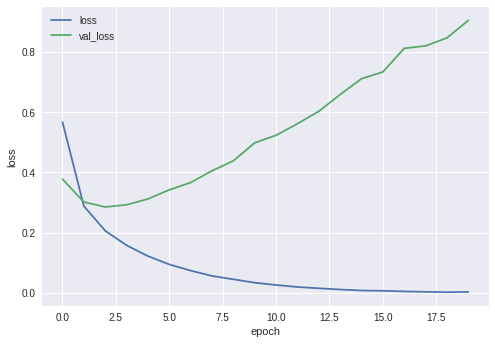

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### **Visualiser les prédictions**

In [ ]:
import numpy as np

In [ ]:
y_pred = model.predict(x_test, verbose=1)

25000/25000 [==============================] - 1s 40us/step


In [ ]:
y_pred

25000

In [ ]:
Y_pred = np.where(y_pred > 0.5, 1, 0)
Y_pred = np.hstack(Y_pred)

In [ ]:
for i in range(10):
  ix = np.random.choice(len(Y_pred))
  pred = Y_pred[ix]
  pred = (lambda x: 'Bon commentaire' if x == 1 else 'Mauvais commentaire')(pred)
  phrase = x_test[ix]
  phrase = decode_review(phrase)
  print(pred)
  print(phrase)
  print('---------------------------------')

Mauvais commentaire
<START> i went to see this film at the cinema on the strength of its potentially interesting subject matter good cast a director who had previously done the highly rated once were warriors and my liking for noir ish films set in l a in the forties and fifties i would argue that i am reasonably easy to please in this film category i appreciate the classics of the genre but i will sit through and enjoy a half decent if derivative effort as well however i found this film completely unbearable br br despite a good situation in which to place the story nobody seems to do or say anything remotely interesting or entertaining in the whole two hours plus of this sorry mess good actors are wasted in endless scenes of dialogue ranging from banal to embarrassing the narrative is slack and drags <UNK> and none of the events it depicts is handled well enough to do anything other than bore the audience to death there is no drama no atmosphere no tension absolutely no entertainment

### **Visualiser les mauvaises prédiction**

In [ ]:
ix_wrong_pred = np.where(Y_pred != y_test)[0]

In [ ]:
ix_wrong_pred.shape

(4132,)

In [ ]:
for i in range(10):
  ix = np.random.choice(ix_wrong_pred)
  pred = Y_pred[ix]
  pred = (lambda x: 'Bon commentaire' if x == 1 else 'Mauvais commentaire')(pred)
  ground_truth = y_test[ix]
  ground_truth = (lambda x: 'Bon commentaire' if x == 1 else 'Mauvais commentaire')(ground_truth)
  phrase = x_test[ix]
  phrase = decode_review(phrase)
  print('Ground truth :',ground_truth, '| Prediction :', pred)
  print(phrase)
  print('---------------------------------')

Ground truth : Bon commentaire | Prediction : Mauvais commentaire
<START> <UNK> main criticism of this film namely that macy suddenly looks jewish upon <UNK> his glasses is misplaced the glasses are just the little bit of change needed to convince others he's a jew the scene in which he says to his boss <UNK> but you know what my background is along with another discussion with his mother suggests that he's had to fight this same <UNK> in the past the glasses now make him look just jewish enough to confirm his and co <UNK> existing <UNK> then there is his new wife's large nose and taste for loud clothes which of course means she's jewish the whole point of the film is how those little stereotypical <UNK> become the entire basis for judging others br br if he has a <UNK> he must be gay if he has long hair he <UNK> <UNK> if he's hispanic he's got a knife and if he has round black glasses and he's slight of build he must be jewish those statements all sound equally im plausible to me if t